In [13]:
pkg load image

# Añadiendo ruido

* Gaussiano, con varianzas: 
    - 0.01
    - 0.04
    - 0.08
* Sal y pimienta: 
    - 0.01
    - 0.04
    - 0.08
* Speckle: 
    - 0.02
    - 0.04
    - 0.08


In [2]:
BASE_PATH = "./Imagenes/uniques/";
files = {"barbara",
"blur",
"boat",
"cameraman",
"coins",
"concordorthophoto",
"hands1",
"house",
"jetplane",
"lake",
"lena",
"liftingbody",
"livingroom",
"mandril",
"peppers",
"pirate",
"plate",
"platesp",
"pout",
"rice",
"saturn",
"test2",
"test",
"text",
"tire",
"walkbridge",
"westconcordorthophoto",
"woman_blonde",
"woman_darkhair"};

SUFIX = {"_gauss_001.png",
"_gauss_004.png",
"_gauss_008.png",
"_sp_001.png",
"_sp_004.png",
"_sp_008.png",
"_speck_002.png",
"_speck_004.png",
"_speck_008.png"};

In [ ]:
for ii = [1:size(files)(1)]
    current_img_path = strjoin({BASE_PATH, files{ii}, ".png"}, "");
    curr_img = imread(current_img_path);
    
    disp(files{ii});
    
    if size(size(curr_img))(2) > 2
        curr_img = uint8(rgb2gray(curr_img));
        imwrite(curr_img, current_img_path);
    elseif max(max(curr_img)) == 1 && min(min(curr_img)) == 0
        curr_img = uint8(curr_img * 255);
        imwrite(curr_img, current_img_path);
    end
    
    % gauss
    imwrite(imnoise(curr_img,'gaussian',0 , 0.01), strjoin({PATH, files{ii}, "_gauss_001.png"}, ""));
    imwrite(imnoise(curr_img,'gaussian',0 , 0.04), strjoin({PATH, files{ii}, "_gauss_004.png"}, ""));
    imwrite(imnoise(curr_img,'gaussian',0 , 0.08), strjoin({PATH, files{ii}, "_gauss_008.png"}, ""));
    
    % sal y pimienta
    imwrite(imnoise(curr_img,'salt & pepper', 0.01), strjoin({PATH, files{ii}, "_sp_001.png"}, ""));
    imwrite(imnoise(curr_img,'salt & pepper', 0.04), strjoin({PATH, files{ii}, "_sp_004.png"}, ""));
    imwrite(imnoise(curr_img,'salt & pepper', 0.08), strjoin({PATH, files{ii}, "_sp_008.png"}, ""));
    
    % speckel
    imwrite(imnoise(curr_img,'speckle', 0.02), strjoin({PATH, files{ii}, "_speck_002.png"}, ""));
    imwrite(imnoise(curr_img,'speckle', 0.04), strjoin({PATH, files{ii}, "_speck_004.png"}, ""));
    imwrite(imnoise(curr_img,'speckle', 0.08), strjoin({PATH, files{ii}, "_speck_008.png"}, ""));
    
end

In [3]:
function padded = padding(matrix, type_of, mask_size)

    % Como usar esta funcion
    % matrix es el valor de la imagen (si es a color, debera ser convertida a escala de grises o binarizarse)
    % type_of es el tipo de padding, 1 es el padding con reflejo, 2 es el padding con zeros (recomendado
    % para morfologia)
    % mask_size  es el TAMANO de la mascara, no la mascara, por que si se desea pasar la mascara, se debe usar
    % size(<mascara>) , nunca pasar la mascara.
    
    [x,y] = size(matrix);
    m_x = mask_size(1);
    m_y = mask_size(2);
    
    if m_x == m_y
        n_ref = (m_x - 1) / 2;
        
        % Mirrored
        if type_of == 1
            temp = matrix;
            
            % left - right
            temp = [fliplr(matrix(:,1:n_ref)) , matrix, fliplr(matrix)(:,1:n_ref)];
            temp = [fliplr(rot90(temp(1:n_ref,:),2)) ; temp ; fliplr(rot90(temp,2)(1:n_ref,:))];
            padded = temp;
        % Zero-ed
        elseif type_of == 2
            temp = zeros(x + 2 * n_ref, y + 2 * n_ref);
            temp(1 + n_ref:end - n_ref,1 + n_ref:end - n_ref) = matrix;
            padded = temp;
        else
            padded = zeros(x,y);
        end
    else
        padded = zeros(x,y);
    end
end

In [14]:
function conv_matrix =  f_mean(image, n_filter)
    
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img = double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double(ones(n_filter, n_filter) / n_mean);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [5]:
function conv_matrix =  f_mean_rang(image, n_filter, rang)
    
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img = double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            max_ref = temp(n_ref +1,n_ref + 1) + rang;
            min_ref = temp(n_ref +1,n_ref + 1) - rang;
            
            ref_idx = ((temp < max_ref) + (temp > min_ref)) ~= 0;
            
            ref_mean = sum(sum(ref_idx));
            
            conv_matrix(s,t) =  sum(sum(temp(find(ref_idx)))) / ref_mean;
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [6]:
function conv_matrix =  f_mean_2(image, n_filter)
    
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img = double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = (n_filter ^ 2) + 1;
    
    filter = double(ones(n_filter, n_filter));
    filter(n_ref+1, n_ref+1) = filter(n_ref+1, n_ref+1) + 1.0;
    filter = filter / n_mean;
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [7]:
function conv_matrix =  f_median(image, n_filter)
    
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img = double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    filter_amount = n_filter ^ 2;
      
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  median(reshape(temp, [1 filter_amount]));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [8]:
function conv_matrix =  f_gauss(image, n_filter)
    
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img = double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    % 0.84932
    % sqrt((n ^ 2 - 1) / 12)
    filter = fspecial('gaussian',[n_filter, n_filter],1);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
    
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [9]:
function conv_matrix =  f_paso_alto(image, n_filter)
    
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img = double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = (n_filter ^ 2) - 1;
    filter = -1 .* double(ones(n_filter, n_filter));
    filter = filter / n_mean;
    filter(n_ref+1, n_ref+1) = 1;
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [10]:
function conv_matrix =  f_EA(image, n_filter, A)
    og_img = image;
    paso_alto = f_paso_alto(image, n_filter);
    
    conv_matrix = ((A - 1) .* og_img) - paso_alto;
end

In [15]:
disp(SUFIX);
disp(files);

{
  [1,1] = _gauss_001.png
  [2,1] = _gauss_004.png
  [3,1] = _gauss_008.png
  [4,1] = _sp_001.png
  [5,1] = _sp_004.png
  [6,1] = _sp_008.png
  [7,1] = _speck_002.png
  [8,1] = _speck_004.png
  [9,1] = _speck_008.png
}
{
  [1,1] = barbara
  [2,1] = blur
  [3,1] = boat
  [4,1] = cameraman
  [5,1] = coins
  [6,1] = concordorthophoto
  [7,1] = hands1
  [8,1] = house
  [9,1] = jetplane
  [10,1] = lake
  [11,1] = lena
  [12,1] = liftingbody
  [13,1] = livingroom
  [14,1] = mandril
  [15,1] = peppers
  [16,1] = pirate
  [17,1] = plate
  [18,1] = platesp
  [19,1] = pout
  [20,1] = rice
  [21,1] = saturn
  [22,1] = test2
  [23,1] = test
  [24,1] = text
  [25,1] = tire
  [26,1] = walkbridge
  [27,1] = westconcordorthophoto
  [28,1] = woman_blonde
  [29,1] = woman_darkhair
}


# DEMO

   0.075114   0.123841   0.075114
   0.123841   0.204180   0.123841
   0.075114   0.123841   0.075114
DEBUG: FC_WEIGHT didn't match


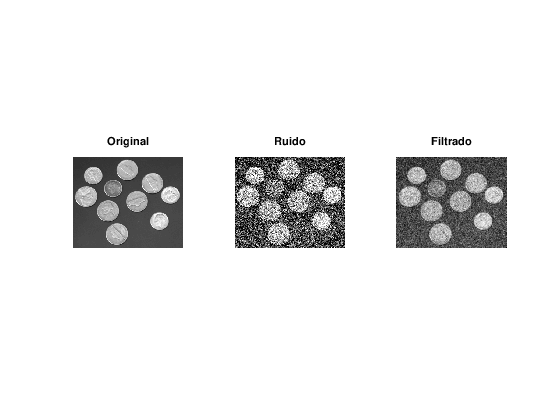

In [18]:
amount_files = size(files)(1);
amount_sufix = size(SUFIX)(1);

i_img = 5;
i_suf = 3;
n_ref = 3;

rang = 20;
A = 9;

current_path = strjoin({BASE_PATH, files{i_img}, ".png"}, "");
current_img = imread(current_path);

if size(size(current_img))(2) > 2
    current_img = uint8(rgb2gray(current_img));
end

og_img = current_img;

figure;
subplot(1,3,1); imshow(og_img); title("Original")


noise_path = strjoin({BASE_PATH, files{i_img}, SUFIX{i_suf}}, "");
noise_img = imread(noise_path);

subplot(1,3,2); imshow(noise_img); title("Ruido");

% % %

% denoised = f_mean(noise_img, n_ref);
% denoised = f_mean_rang(noise_img, n_ref, rang);
% denoised = f_mean_2(noise_img, n_ref);
% denoised = f_median(noise_img, n_ref);
denoised = f_gauss(noise_img, n_ref);
% denoised = f_paso_alto(og_img, n_ref);
% denoised = f_EA(og_img, n_ref, A);

subplot(1,3,3); imshow(denoised); title("Filtrado");

saveas(1, "./result.png", "png");

# Bordes

In [19]:
function conv_matrix =  f_roberts_gx(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([0 0 0; 0 1 0; 0 0 -1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

% 

function conv_matrix =  f_roberts_gy(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([0 0 0; 0 0 1; 0 -1 0]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

%%%%

function conv_matrix =  f_roberts(image)
    conv_matrix = f_roberts_gx(image) + f_roberts_gy(image);
end

In [20]:
function conv_matrix =  f_prewitt_gx(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([-1 -1 -1; 0 0 0; 1 1 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

% 

function conv_matrix =  f_prewitt_gy(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([-1 0 1; -1 0 1; -1 0 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

%%%%

function conv_matrix =  f_prewitt(image)
    conv_matrix = f_prewitt_gx(image) + f_prewitt_gy(image);
end

In [21]:
function conv_matrix =  f_sobel_gx(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([-1 -2 -1; 0 0 0; 1 2 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

% 

function conv_matrix =  f_sobel_gy(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([-1 0 1; -2 0 2; -1 0 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

%%%%

function conv_matrix =  f_sobel(image)
    conv_matrix = f_sobel_gx(image) + f_sobel_gy(image);
end

In [22]:
function conv_matrix =  f_laplace(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([0 1 0; 1 -4 1; 0 1 0]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [23]:
function conv_matrix =  f_LOG(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([1 -2 1; -2 4 -2; 1 -2 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

In [24]:
function conv_matrix =  f_kirsch0(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([-1 -1 -1; 0 0 0; 1 1 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

function conv_matrix =  f_kirsch45(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([-1 -1 0; -1 0 1; 0 1 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

function conv_matrix =  f_kirsch90(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([-1 0 1; -1 0 1; -1 0 1]);
    
    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end


function conv_matrix =  f_kirsch135(image)
    
    n_filter = 3;
    gen_img= padding(image, 1, [n_filter, n_filter]);
    gen_img= double(gen_img);
    
    [x,y]=size(gen_img);
    conv_matrix=zeros(x,y);
    
    n_ref = (n_filter - 1) / 2;
    
    n_mean = n_filter ^ 2;
    filter = double([0 1 1; -1 0 1; -1 -1 0]);

    disp(filter);
    
    for s=1+n_ref:x-n_ref
        for t=1+n_ref:y-n_ref
            temp = gen_img(s-n_ref:s+n_ref, t-n_ref:t+n_ref);
            
            conv_matrix(s,t) =  sum(sum(temp .* filter));
        end
    end
    conv_matrix = conv_matrix(1+n_ref:end-n_ref, 1+n_ref:end-n_ref);
    conv_matrix = uint8(conv_matrix);
end

function conv_matrix =  f_kirsch(image)
    conv_matrix = f_kirsch0(image) + f_kirsch45(image) + f_kirsch90(image) + f_kirsch135(image);
end

In [25]:
disp(SUFIX);
disp(files);

{
  [1,1] = _gauss_001.png
  [2,1] = _gauss_004.png
  [3,1] = _gauss_008.png
  [4,1] = _sp_001.png
  [5,1] = _sp_004.png
  [6,1] = _sp_008.png
  [7,1] = _speck_002.png
  [8,1] = _speck_004.png
  [9,1] = _speck_008.png
}
{
  [1,1] = barbara
  [2,1] = blur
  [3,1] = boat
  [4,1] = cameraman
  [5,1] = coins
  [6,1] = concordorthophoto
  [7,1] = hands1
  [8,1] = house
  [9,1] = jetplane
  [10,1] = lake
  [11,1] = lena
  [12,1] = liftingbody
  [13,1] = livingroom
  [14,1] = mandril
  [15,1] = peppers
  [16,1] = pirate
  [17,1] = plate
  [18,1] = platesp
  [19,1] = pout
  [20,1] = rice
  [21,1] = saturn
  [22,1] = test2
  [23,1] = test
  [24,1] = text
  [25,1] = tire
  [26,1] = walkbridge
  [27,1] = westconcordorthophoto
  [28,1] = woman_blonde
  [29,1] = woman_darkhair
}


# DEMO

  -0.12500  -0.12500  -0.12500
  -0.12500   1.00000  -0.12500
  -0.12500  -0.12500  -0.12500
DEBUG: FC_WEIGHT didn't match


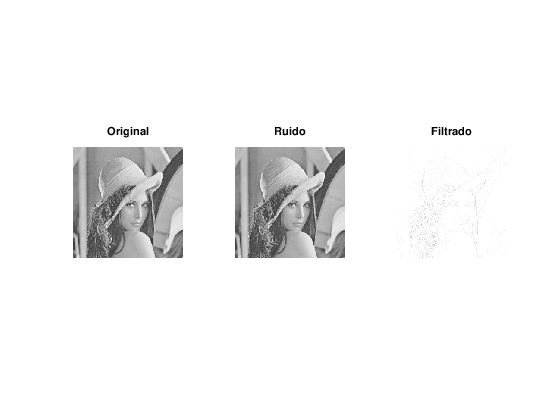

In [30]:
amount_files = size(files)(1);
amount_sufix = size(SUFIX)(1);

i_img = 11;
i_suf = 0;
n_ref = 3;

rang = 20;
A = 6;

current_path = strjoin({BASE_PATH, files{i_img}, ".png"}, "");
current_img = imread(current_path);

if size(size(current_img))(2) > 2
    current_img = uint8(rgb2gray(current_img));
end

og_img = current_img;

figure;
subplot(1,3,1); imshow(og_img); title("Original")

if i_suf == 0
    noise_img = og_img;
else
    noise_path = strjoin({BASE_PATH, files{i_img}, SUFIX{i_suf}}, "");
    noise_img = imread(noise_path);
end

% noise_img = 256 - noise_img;

subplot(1,3,2); imshow(noise_img); title("Ruido");

% % %

% edge_img = f_roberts(noise_img);
% edge_img = f_roberts_gx(noise_img);
% edge_img = f_roberts_gy(noise_img);
% edge_img = f_prewitt(noise_img);
% edge_img = f_prewitt_gx(noise_img);
% edge_img = f_prewitt_gy(noise_img);
% edge_img = f_sobel(noise_img);
% edge_img = f_sobel_gx(noise_img);
% edge_img = f_sobel_gy(noise_img);
% edge_img = f_laplace(noise_img);
% edge_img = f_LOG(noise_img);
% edge_img = f_kirsch(noise_img);
% edge_img = f_kirsch0(noise_img);
% edge_img = f_kirsch45(noise_img);
% edge_img = f_kirsch90(noise_img);
% edge_img = f_kirsch135(noise_img);


% subplot(1,3,3); imshow(edge_img); title("Borde");

%denoised = f_paso_alto(og_img, n_ref);
denoised = f_EA(og_img, n_ref, A);

subplot(1,3,3); imshow(denoised); title("Filtrado");

saveas(1, "./result.png", "png");

In [ ]:
edge_img1 = f_kirsch0(noise_img);
edge_img2 = f_kirsch45(noise_img);
edge_img3 = f_kirsch90(noise_img);
edge_img4 = f_kirsch135(noise_img);

figure;

subplot(2,2,1); imshow(edge_img1); title('0');
subplot(2,2,2); imshow(edge_img2); title('45');
subplot(2,2,3); imshow(edge_img3); title('90');
subplot(2,2,4); imshow(edge_img4); title('135');

saveas(1, './debug.png', 'png');

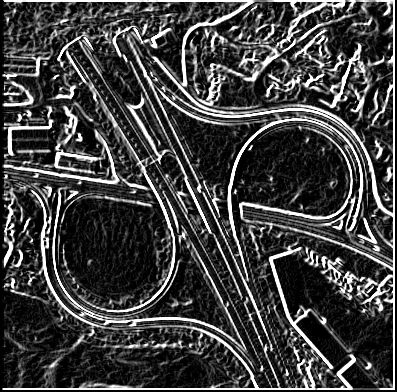

In [32]:
imshow(edge_img1 + edge_img2 + edge_img3 + edge_img4)

In [ ]:
disp(sum(sum((edge_img1 == edge_img2) ~= 1)));
disp(sum(sum((edge_img1 == edge_img3) ~= 1)));
disp(sum(sum((edge_img1 == edge_img4) ~= 1)));
disp(sum(sum((edge_img2 == edge_img3) ~= 1)));

In [ ]:
mean(mean(edge_img1))
mean(mean(edge_img2))
mean(mean(edge_img3))
mean(mean(edge_img4))

  -1  -1  -1
   0   0   0
   1   1   1
  -1  -1   0
  -1   0   1
   0   1   1
  -1   0   1
  -1   0   1
  -1   0   1
   0   1   1
  -1   0   1
  -1  -1   0
DEBUG: FC_WEIGHT didn't match


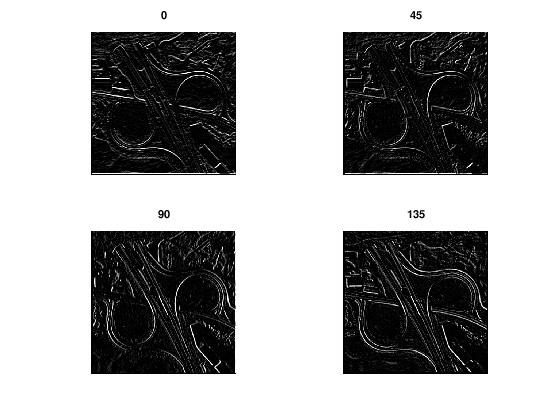

In [31]:
nice_img = imread("./via.PNG");
nice_img = rgb2gray(nice_img);


edge_img1 = f_kirsch0(nice_img);
edge_img2 = f_kirsch45(nice_img);
edge_img3 = f_kirsch90(nice_img);
edge_img4 = f_kirsch135(nice_img);

figure;

subplot(2,2,1); imshow(edge_img1); title('0');
subplot(2,2,2); imshow(edge_img2); title('45');
subplot(2,2,3); imshow(edge_img3); title('90');
subplot(2,2,4); imshow(edge_img4); title('135');

saveas(1, './debug.png', 'png');

In [ ]:
disp(sum(sum((edge_img1 == edge_img2) ~= 1)));
disp(sum(sum((edge_img1 == edge_img3) ~= 1)));
disp(sum(sum((edge_img1 == edge_img4) ~= 1)));
disp(sum(sum((edge_img2 == edge_img3) ~= 1)));

In [ ]:
% edge_img1 = f_kirsch0(nice_img);
% edge_img2 = f_kirsch45(nice_img);
% edge_img3 = f_kirsch90(nice_img);
% edge_img4 = f_kirsch135(nice_img);

figure;

subplot(1,2,1); imshow(f_prewitt_gx(nice_img)); title('x');
subplot(1,2,2); imshow(f_prewitt_gy(nice_img)); title('y');

saveas(1, './debug.png', 'png');

In [ ]:
disp(sum(sum((edge_img1 == edge_img2) ~= 1)));

In [ ]:
imshow(edge_img1 + edge_img2);